In [1]:
import cv2
import numpy as np
import os
import glob

In [2]:
videos = glob.glob('./video_in/*.avi')
print(videos)

['./video_in/HeartRate_2.avi']


In [3]:
#just get the file name nothing less nothing more
filename_ext = os.path.basename(videos[0])
filename, file_extension  = os.path.splitext(filename_ext)
print(filename)

HeartRate_2


In [4]:
# here's the main working pipeline
# we going to read out the video frame by frame
# then using our face landmark detection to marking the frame and write it out another video

# get video handle
video = videos[0]
cap_in = cv2.VideoCapture(video)
try:
    # Find OpenCV version
    (major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')
    if int(major_ver)  < 3 :
        fps = cap_in.get(cv2.cv.CV_CAP_PROP_FPS)
        total = int(cap_in.get(cv2.cv.CAP_PROP_FRAME_COUNT))
        print("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
    else :
        fps = cap_in.get(cv2.CAP_PROP_FPS)
        total = int(cap_in.get(cv2.CAP_PROP_FRAME_COUNT))
        print("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))
except:
    cap_in.release()
    cv2.destroyAllWindows()
    

Frames per second using video.get(cv2.CAP_PROP_FPS) : 30.00003000003


In [5]:
from PIL import Image, ImageDraw
import face_recognition

def draw_landmark(img_in):
    rgb_img = cv2.cvtColor(img_in, cv2.COLOR_BGR2RGB)
    #     face_recognition.load_image_file()
    # Load the jpg file into a numpy array
    # image = face_recognition.load_image_file("biden.jpg")

    # Find all facial features in all the faces in the image
    face_landmarks_list = face_recognition.face_landmarks(rgb_img)

    print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

    for face_landmarks in face_landmarks_list:

        # Print the location of each facial feature in this image
#         for facial_feature in face_landmarks.keys():
#             print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

        # Let's trace out each facial feature in the image with a line!
        pil_image = Image.fromarray(img_in)
        d = ImageDraw.Draw(pil_image)

        for facial_feature in face_landmarks.keys():
            d.line(face_landmarks[facial_feature], width=5)
        rgb_img = np.asarray(pil_image)
        bgr_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)
        return bgr_img

In [6]:

init = 0;
while(True):
    ret, frame = cap_in.read()
    if not ret:
        print(ret)
        break
    if(init < 1):
        init = 1
        video_output = './video_out/' + filename + '_out.mp4'
        fourcc = cv2.VideoWriter_fourcc(*'MP4V')
        print(video_output)
        size = frame.shape[1], frame.shape[0]
        vid = cv2.VideoWriter(video_output,fourcc,float(fps),size)
        
    lm_img = draw_landmark(frame)
    vid.write(lm_img)
vid.release()
cap_in.release()
cv2.destroyAllWindows()
print('done')

#         output_filename = output_folder +'/'+ filename + '_' + ('%04d' %frame_num)+'.jpg'
#         print ('Creating...' + output_filename)
#         cv2.imwrite(output_filename, frame)
#     frame_num += 1   

./video_out/HeartRate_2_out.mp4
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) 

I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 fa

I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 fa

In [7]:
ret, frame = cap_in.read()

In [8]:
plt.imshow(frame)
rgb_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
lm_img = draw_landmark(rgb_img)
plt.imshow(lm_img)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
aa = np.asarray(lm_img)
type(aa)
plt.imshow(aa)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
image_fr = face_recognition.load_image_file("../face_recognition/examples/biden.jpg")
image_cv = cv2.imread("../face_recognition/examples/biden.jpg")
# plt.figure(figsize=(40,10))
# plt.imshow(ret_img)
# plt.show()
# cv2.imshow("images", image)
# cv2.waitKey()

In [10]:
print(image_fr.shape)
print(image_cv.shape)

(2204, 970, 3)
(2204, 970, 3)


In [ ]:
type(image)

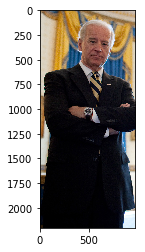

numpy.ndarray

In [17]:
rgb_img = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()
type(rgb_img)

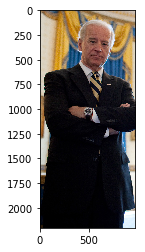

In [12]:
plt.imshow(image_fr)
plt.show()

In [24]:
cap_in.release()